In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set plotting style
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.titleweight'] = 'bold'


In [167]:
def create_simple_bar_chart(df, x_column, y_column, title=None, ylabel=None, width=0.8):
    """
    Create a simple bar chart for SUMO data (single series, no algorithms).
    
    Parameters:
    -----------
    df : DataFrame
        Data with x_column and y_column
    x_column : str
        Name of the x-axis column
    y_column : str
        Name of the y-axis column to plot
    title : str, optional
        Chart title
    ylabel : str, optional
        Y-axis label (default: y_column)
    width : float, optional
        Width of bars (default: 0.8, use 0.4-0.5 for thinner bars)
    """
    # Sort by x_column
    df_sorted = df.sort_values(x_column)
    x_values = df_sorted[x_column].values
    y_values = df_sorted[y_column].values
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create bars with specified width
    bars = ax.bar(x_values, y_values, 
                  width=width,
                  color='#1f77b4',  # Blue color
                  edgecolor='black', 
                  linewidth=0.5)
    
    # Add value labels on top of bars
    for bar, val in zip(bars, y_values):
        height = bar.get_height()
        # Format value based on magnitude
        if val < 10:
            label_text = f'{val:.2f}'
        elif val < 100:
            label_text = f'{val:.1f}'
        else:
            label_text = f'{int(val)}'
        ax.text(bar.get_x() + bar.get_width()/2., height,
               label_text,
               ha='center', va='bottom',
               fontsize=10, fontweight='normal')
    
    # Customize axes
    ax.set_xlabel(x_column, fontweight='bold')
    ax.set_ylabel(ylabel or y_column, fontweight='bold')
    if title:
        ax.set_title(title, fontweight='bold', pad=20)
    else:
        ax.set_title(f'{y_column} vs {x_column}', fontweight='bold', pad=20)
    
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values)
    
    # Calculate smart y-axis range to make differences visible
    y_min = min(y_values)
    y_max = max(y_values)
    y_range = y_max - y_min
    if y_min > 0 and y_range > 0:
        if y_min > y_range * 0.5:
            y_bottom = max(0, y_min * 0.95)
        else:
            y_bottom = max(0, y_min - (y_range * 0.1))
        ax.set_ylim(bottom=y_bottom, top=y_max * 1.05)
    else:
        ax.set_ylim(bottom=0, top=y_max * 1.05)
    
    # Add grid
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax.set_axisbelow(True)
    
    plt.tight_layout()
    return fig, ax


In [168]:
# Load data
base_path = Path.cwd()
if base_path.name == 'viz':
    base_path = base_path.parent

# Load Threshold data
df_threshold = pd.read_csv(base_path / 'data_sumo_static' / 'sumo_static _Threshold.csv')
print("Threshold Data:")
print(df_threshold)
print()

# Load Swap Time data
df_swaptime = pd.read_csv(base_path / 'data_sumo_static' / 'sumo_static_SwappingTime.csv')
print("Swap Time Data:")
print(df_swaptime)
print()

# Load Module Change data
df_modulechange = pd.read_csv(base_path / 'data_sumo_static' / 'sumo_static_ModuleChange.csv')
print("Module Change Data:")
print(df_modulechange)


Threshold Data:
   Threshold  Total Travel Time  Total Energy Consumed  \
0          5             106.44                 11.338   
1         10              86.54                  8.797   
2         15             104.01                 10.886   
3         20              92.73                  9.051   

   Total Distance Covered  Run Time  Total Module Swapped  
0                   69.18    51.827                     0  
1                   55.14    49.431                     0  
2                   67.32    43.774                     0  
3                   57.52    41.297                     0  

Swap Time Data:
   Swap Time (min)  Total Travel Time  Total Energy Consumed  \
0                1             100.19                 11.000   
1                2              92.73                  9.051   
2                3             100.69                 11.506   
3                4              85.81                  9.750   

   Total Distance Covered  Run Time  Total Module Swapp

# Sumo Static Threshold

## (a) Travel Time


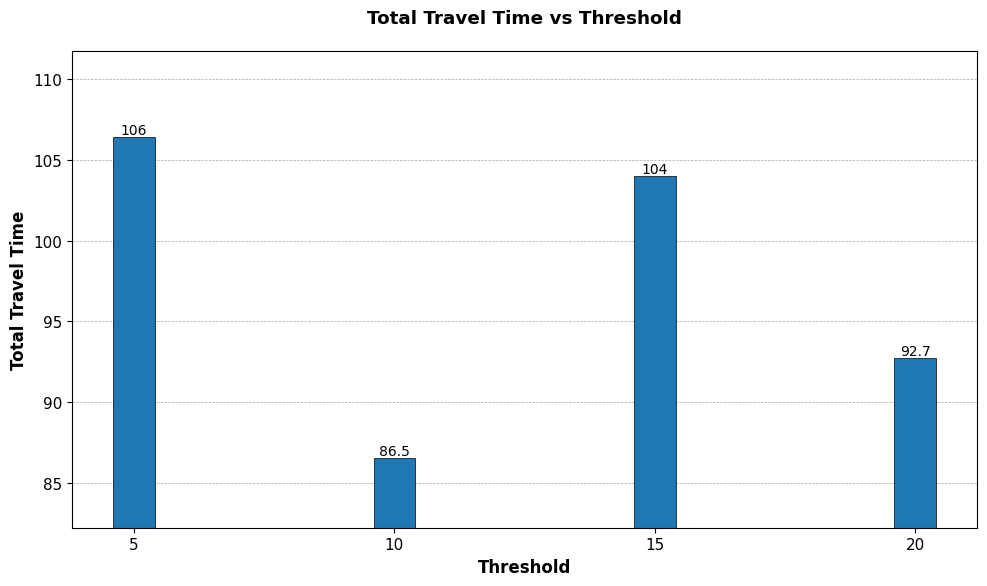

In [169]:
# Threshold - Travel Time
fig, ax = create_simple_bar_chart(
    df_threshold,
    'Threshold',
    'Total Travel Time',
    title='Total Travel Time vs Threshold',
    ylabel='Total Travel Time'
)
plt.show()


## (b) Energy


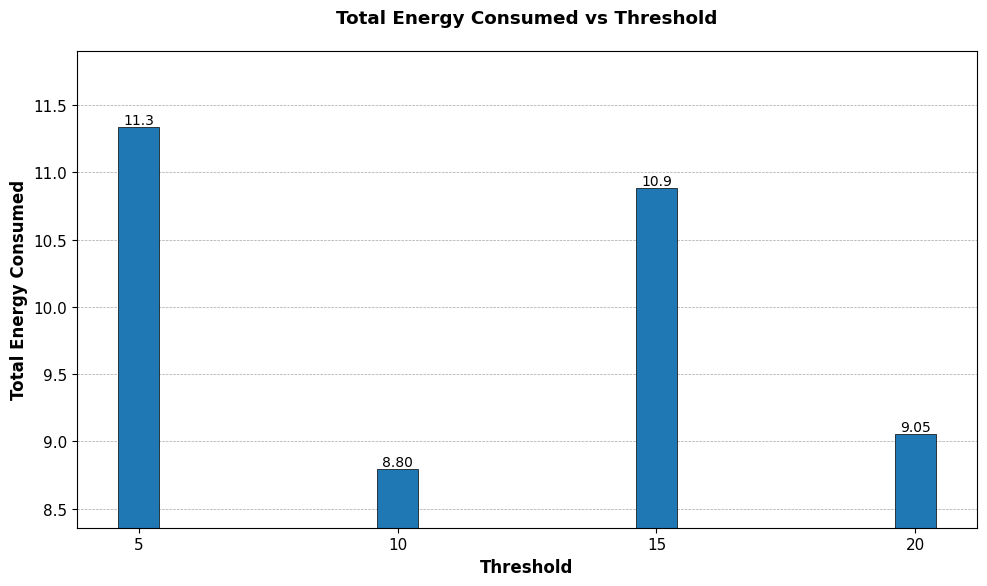

In [170]:
# Threshold - Energy
fig, ax = create_simple_bar_chart(
    df_threshold,
    'Threshold',
    'Total Energy Consumed',
    title='Total Energy Consumed vs Threshold',
    ylabel='Total Energy Consumed'
)
plt.show()


## (c) Distance


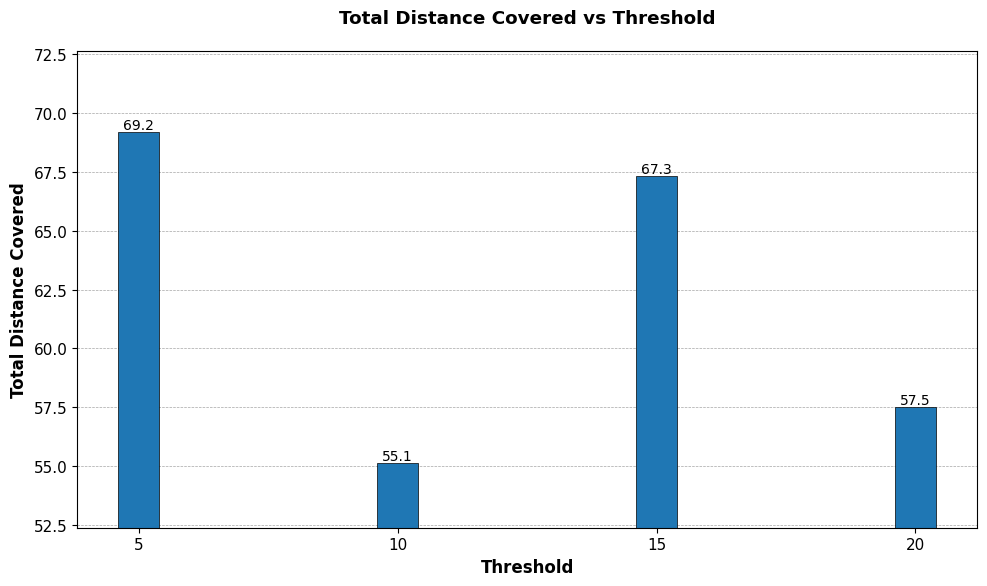

In [171]:
# Threshold - Distance
fig, ax = create_simple_bar_chart(
    df_threshold,
    'Threshold',
    'Total Distance Covered',
    title='Total Distance Covered vs Threshold',
    ylabel='Total Distance Covered'
)
plt.show()


## (d) Module Swapped


C:\Users\ranji\AppData\Local\Temp\ipykernel_27092\3207816769.py:72: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(bottom=0, top=y_max * 1.05)


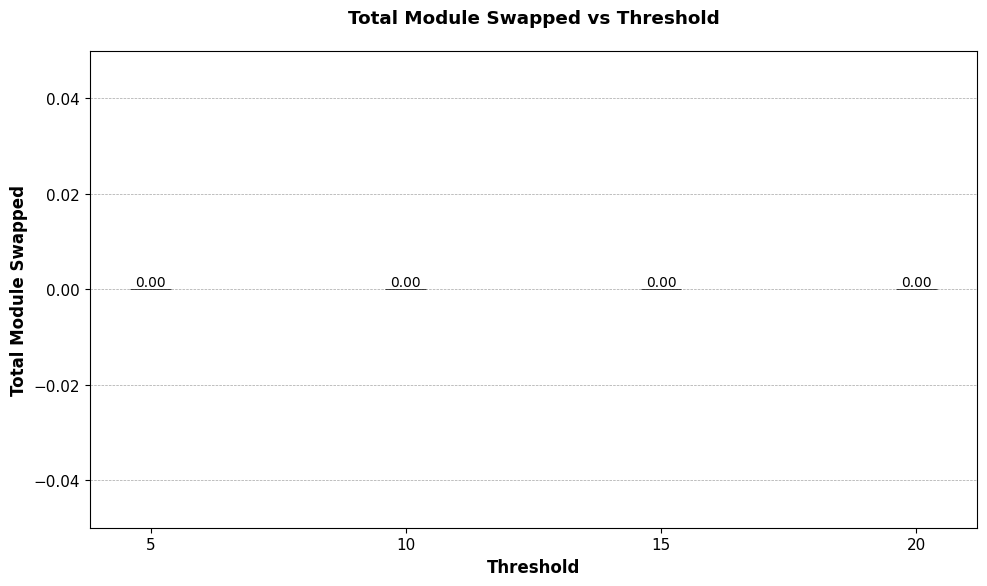

In [172]:
# Threshold - Module Swapped
fig, ax = create_simple_bar_chart(
    df_threshold,
    'Threshold',
    'Total Module Swapped',
    title='Total Module Swapped vs Threshold',
    ylabel='Total Module Swapped'
)
plt.show()


## (e) Run Time


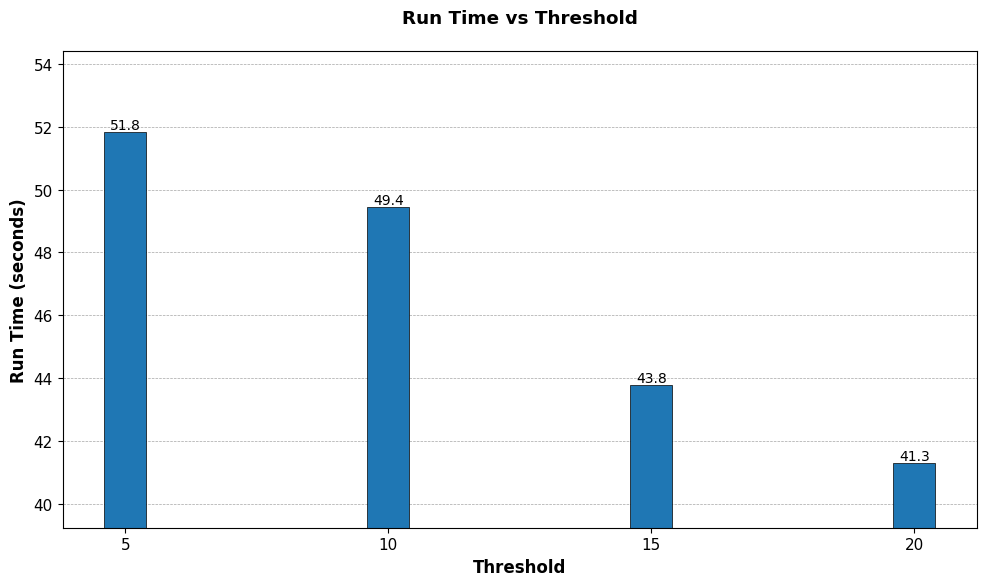

In [173]:
# Threshold - Run Time
fig, ax = create_simple_bar_chart(
    df_threshold,
    'Threshold',
    'Run Time',
    title='Run Time vs Threshold',
    ylabel='Run Time (seconds)'
)
plt.show()


# Sumo Static Swap Time

## (a) Travel Time


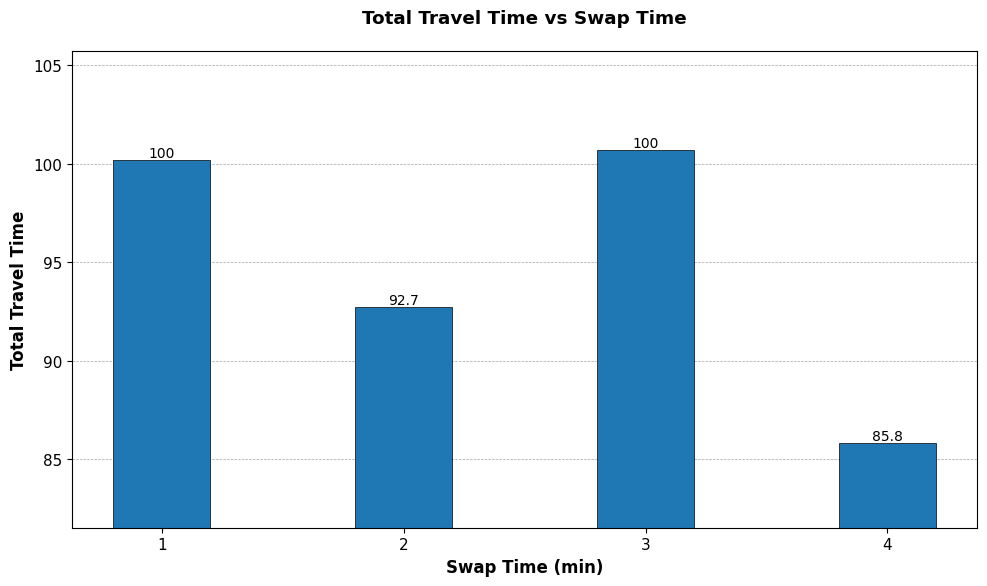

In [174]:
# Swap Time - Travel Time
fig, ax = create_simple_bar_chart(
    df_swaptime,
    'Swap Time (min)',
    'Total Travel Time',
    title='Total Travel Time vs Swap Time',
    ylabel='Total Travel Time',
    width=0.4
)
plt.show()


## (b) Energy


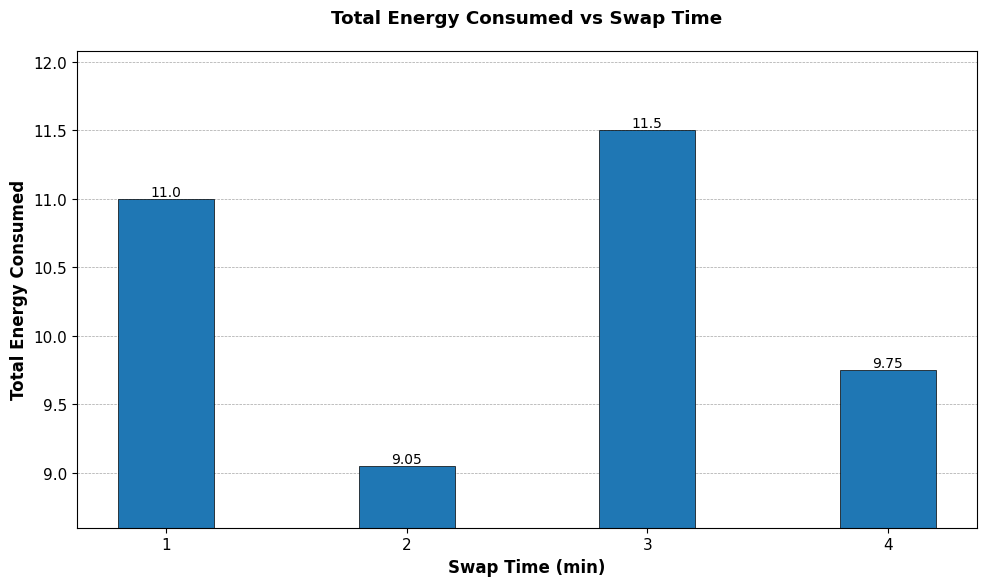

In [175]:
# Swap Time - Energy
fig, ax = create_simple_bar_chart(
    df_swaptime,
    'Swap Time (min)',
    'Total Energy Consumed',
    title='Total Energy Consumed vs Swap Time',
    ylabel='Total Energy Consumed',
    width=0.4
)
plt.show()


## (c) Distance


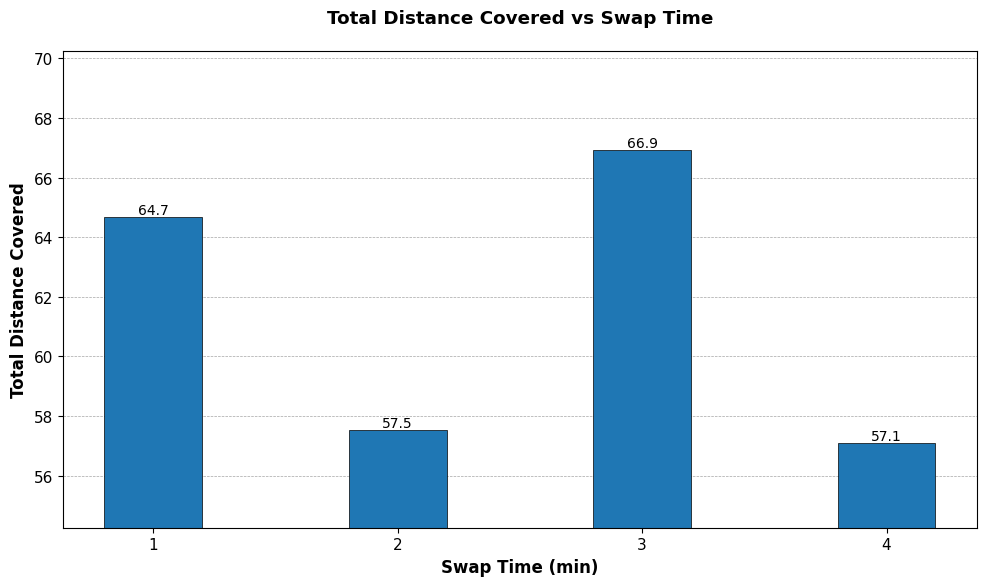

In [176]:
# Swap Time - Distance
fig, ax = create_simple_bar_chart(
    df_swaptime,
    'Swap Time (min)',
    'Total Distance Covered',
    title='Total Distance Covered vs Swap Time',
    ylabel='Total Distance Covered',
    width=0.4
)
plt.show()


## (d) Module Swapped


In [177]:
print(df_swaptime[['Total Module Swapped','Swap Time (min)']])

   Total Module Swapped  Swap Time (min)
0                     0                1
1                     0                2
2                     0                3
3                     0                4


C:\Users\ranji\AppData\Local\Temp\ipykernel_27092\3207816769.py:72: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(bottom=0, top=y_max * 1.05)


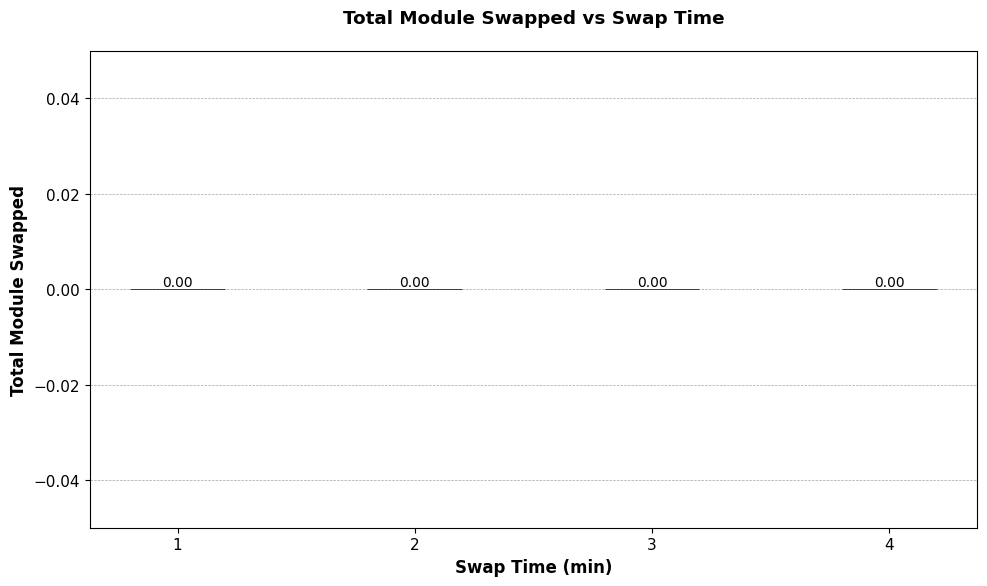

In [178]:
# Swap Time - Module Swapped
fig, ax = create_simple_bar_chart(
    df_swaptime,
    'Swap Time (min)',
    'Total Module Swapped',
    title='Total Module Swapped vs Swap Time',
    ylabel='Total Module Swapped',
    width=0.4
)
plt.show()


## (e) Run Time


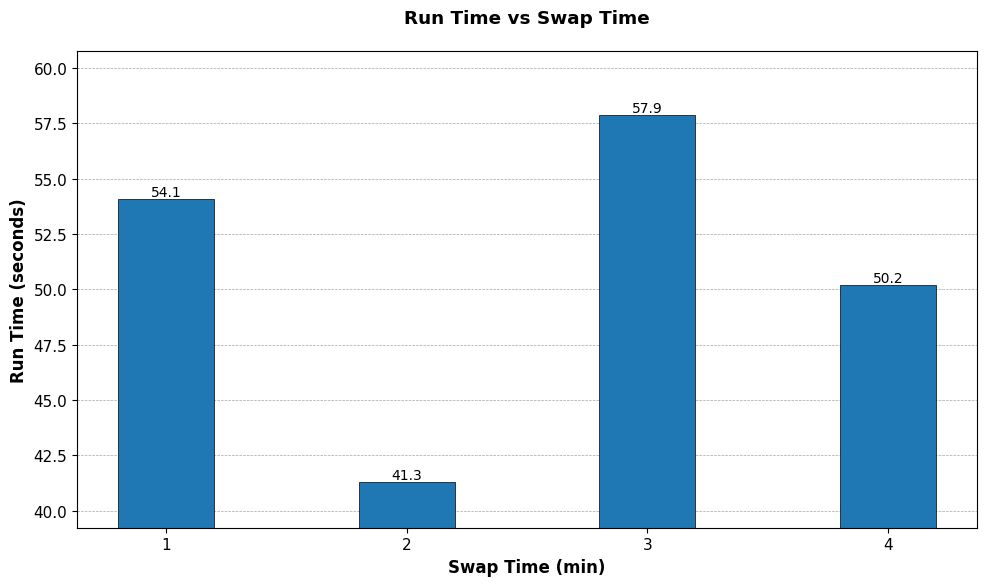

In [179]:
# Swap Time - Run Time
fig, ax = create_simple_bar_chart(
    df_swaptime,
    'Swap Time (min)',
    'Run Time',
    title='Run Time vs Swap Time',
    ylabel='Run Time (seconds)',
    width=0.4
)
plt.show()


# Sumo Static Module Change

## (a) Travel Time


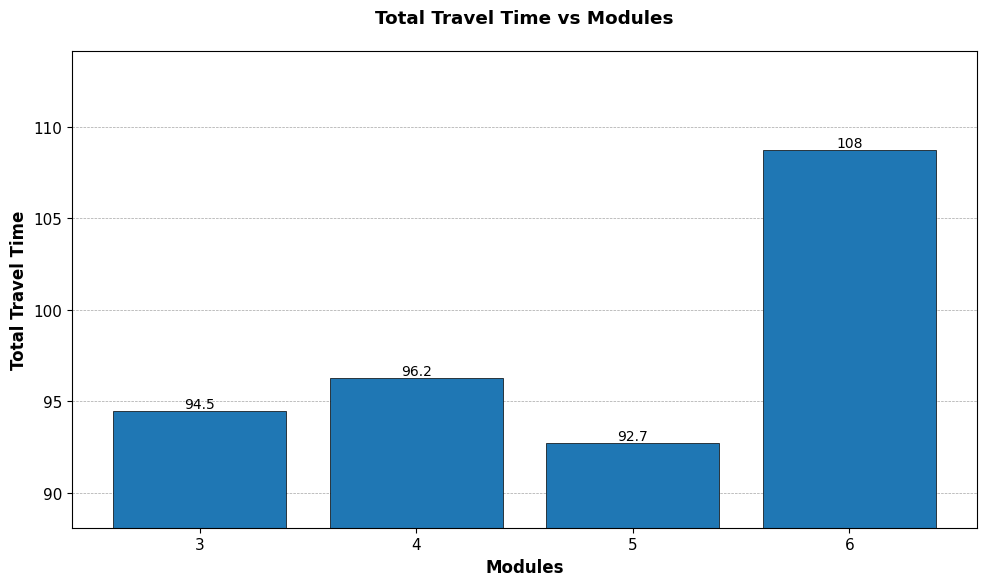

In [180]:
# Module Change - Travel Time
fig, ax = create_simple_bar_chart(
    df_modulechange,
    'Modules',
    'Total Travel Time',
    title='Total Travel Time vs Modules',
    ylabel='Total Travel Time'
)
plt.show()


## (b) Energy


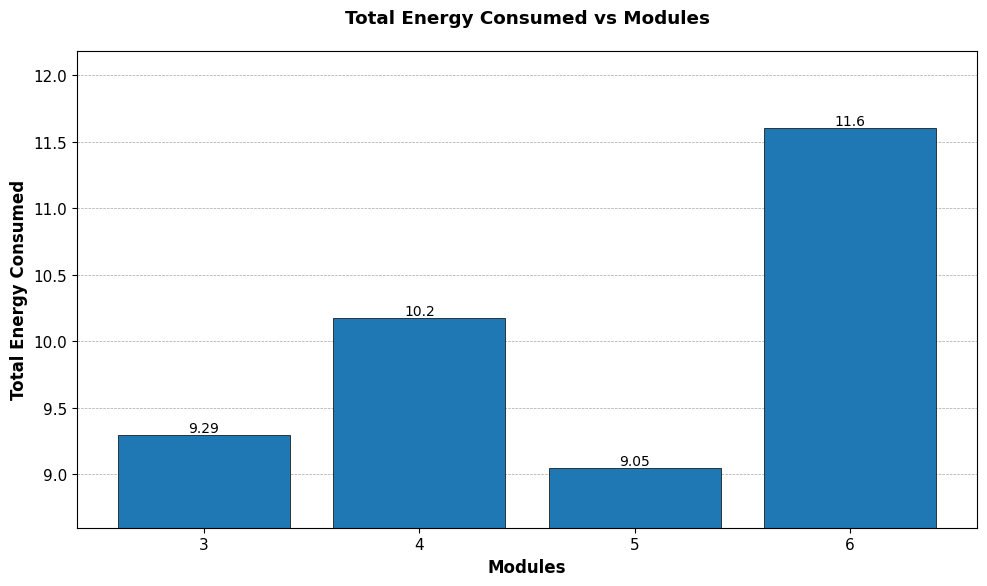

In [181]:
# Module Change - Energy
fig, ax = create_simple_bar_chart(
    df_modulechange,
    'Modules',
    'Total Energy Consumed',
    title='Total Energy Consumed vs Modules',
    ylabel='Total Energy Consumed'
)
plt.show()


## (c) Distance


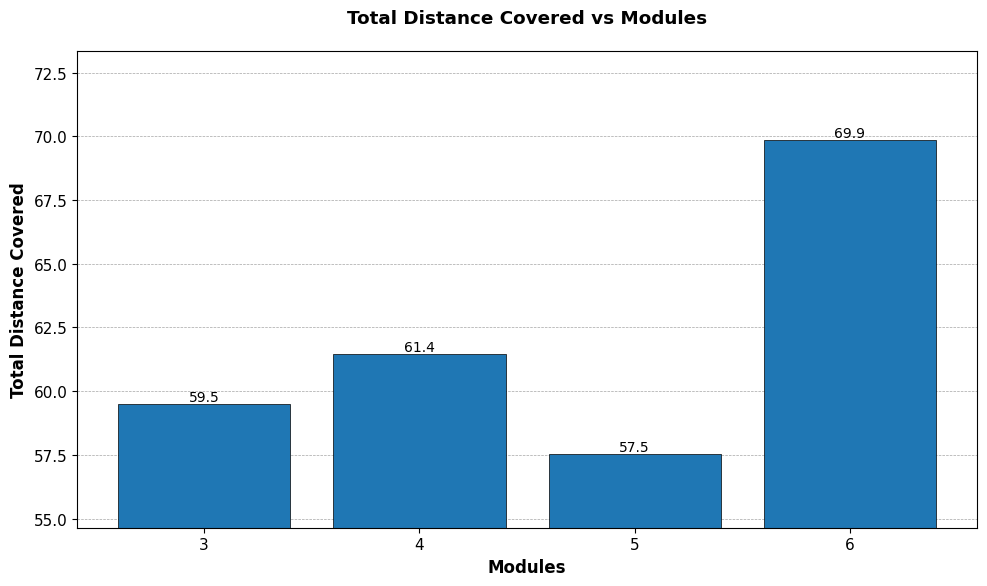

In [182]:
# Module Change - Distance
fig, ax = create_simple_bar_chart(
    df_modulechange,
    'Modules',
    'Total Distance Covered',
    title='Total Distance Covered vs Modules',
    ylabel='Total Distance Covered'
)
plt.show()


## (d) Module Swapped


C:\Users\ranji\AppData\Local\Temp\ipykernel_27092\3207816769.py:72: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(bottom=0, top=y_max * 1.05)


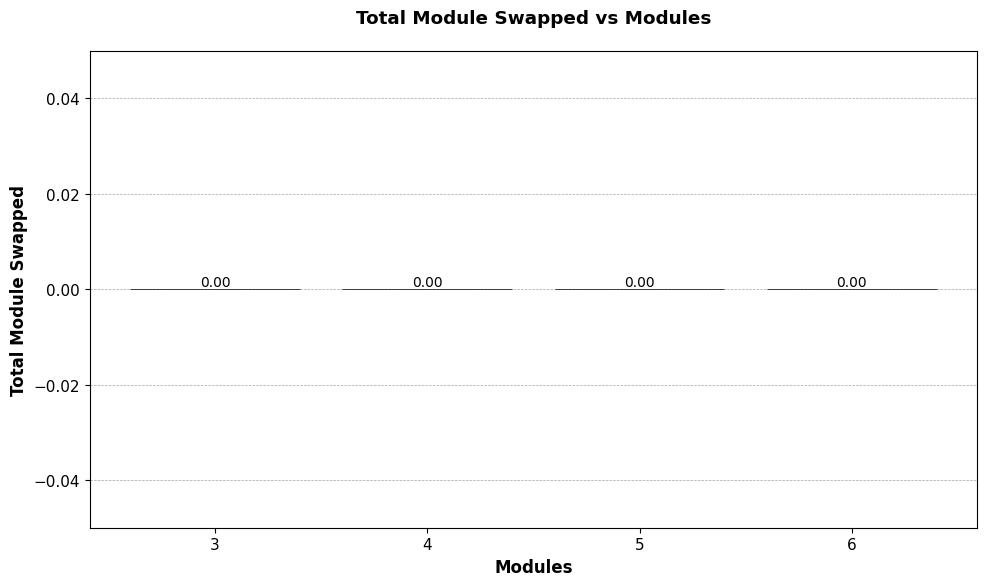

In [183]:
# Module Change - Module Swapped
fig, ax = create_simple_bar_chart(
    df_modulechange,
    'Modules',
    'Total Module Swapped',
    title='Total Module Swapped vs Modules',
    ylabel='Total Module Swapped'
)
plt.show()


## (e) Run Time


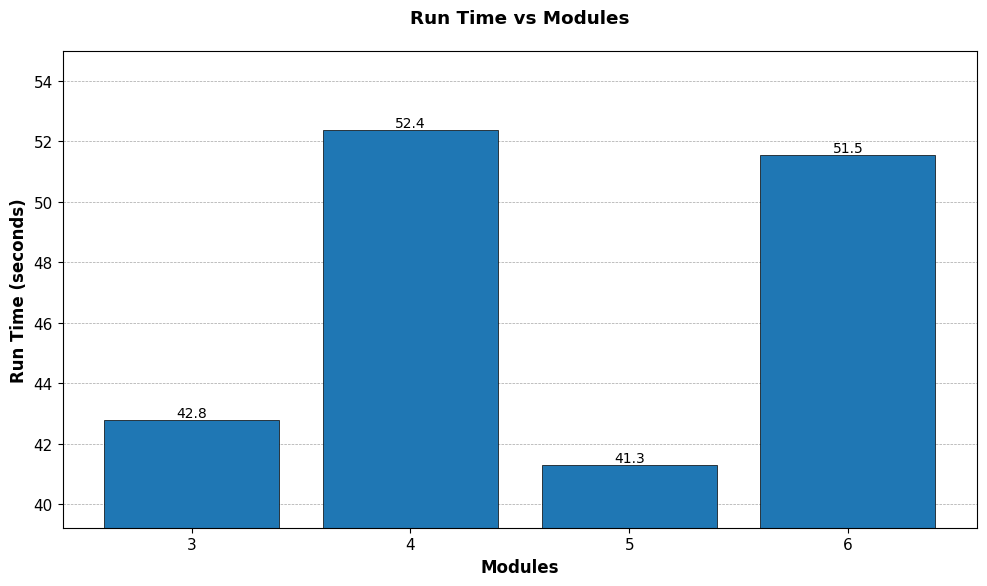

In [184]:
# Module Change - Run Time
fig, ax = create_simple_bar_chart(
    df_modulechange,
    'Modules',
    'Run Time',
    title='Run Time vs Modules',
    ylabel='Run Time (seconds)'
)
plt.show()
